This Python JNB can be used to reconstruct output graphs in the paper Housing Equity Initiative.

1) Import libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<h3>1. Park district facilities in Ward 20.</h3>

1a) Import Ward 20 map.

In [2]:
img = Image.open("ward20.png")

1b) Define a function to convert (lat,lon) to an (x,y) location on the Ward 20 map.

In [3]:
#Function to convert (lat,lon) to (x,y) location on the Ward 20 map
def coord(lat,lon):
    minlon=-87.672079
    maxlon=-87.586493
    xmin=47
    xmax=806
    x=xmin+(lon-minlon)*(xmax-xmin)/(maxlon-minlon)
    minlat=41.778798
    maxlat=41.801243
    ymax=189
    ymin=389
    y=ymin+(lat-minlat)*(ymax-ymin)/(maxlat-minlat)
    return x,y

1c) Import a shape file with the Ward 20 boundary.

In [4]:
import shapefile
sf = shapefile.Reader("ward20.shp")
shapes=sf.shapes()
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point, Polygon

1d) Read in the Chicago Park District data from the Chicago Data Portal.

In [5]:
parks=pd.read_json("https://data.cityofchicago.org/resource/eix4-gf83.json?$limit=400000")

In [6]:
parks.head(1)

,facility_n,facility_t,gisobjid,objectid_1,park,park_no,the_geom,x_coord,y_coord
0,CULTURAL CENTER,SPECIAL,2494,1,HAMILTON (ALEXANDER),9,"{'type': 'Point', 'coordinates': [-87.63769762...",-87.637698,41.762999


In [7]:
p=parks[["facility_n","facility_t","x_coord","y_coord"]]
p.columns=["type","loc","longitude","latitude"]
p.head(1)

,type,loc,longitude,latitude
0,CULTURAL CENTER,SPECIAL,-87.637698,41.762999


In [8]:
p["type"].value_counts()

BASKETBALL BACKBOARD         771
BASEBALL JR/SOFTBALL         537
PLAYGROUND                   517
TENNIS COURT                 507
BASKETBALL COURT             323
FOOTBALL/SOCCER COMBO FLD    249
SPRAY FEATURE                224
BASEBALL SR                  165
GYMNASIUM                    148
COMMUNITY GARDEN              89
HORSESHOE COURT               72
FITNESS CENTER                70
MINI-PITCH                    51
POOL (OUTDOOR)                50
ARTIFICIAL TURF REG           38
PICKLEBALL COURT              35
VOLLEYBALL                    35
GARDEN                        32
TRACK                         31
DOG FRIENDLY AREA             30
BEACH                         29
FITNESS COURSE                29
POOL (INDOOR)                 28
NATURE/BIRD SANCTUARY         27
BOXING CENTER                 21
LAGOON                        20
SPORT ROLLER COURT            20
VOLLEYBALL (SAND)             20
GAME TABLES                   19
CASTING PIER                  19
          

1e) Map the Park District data.

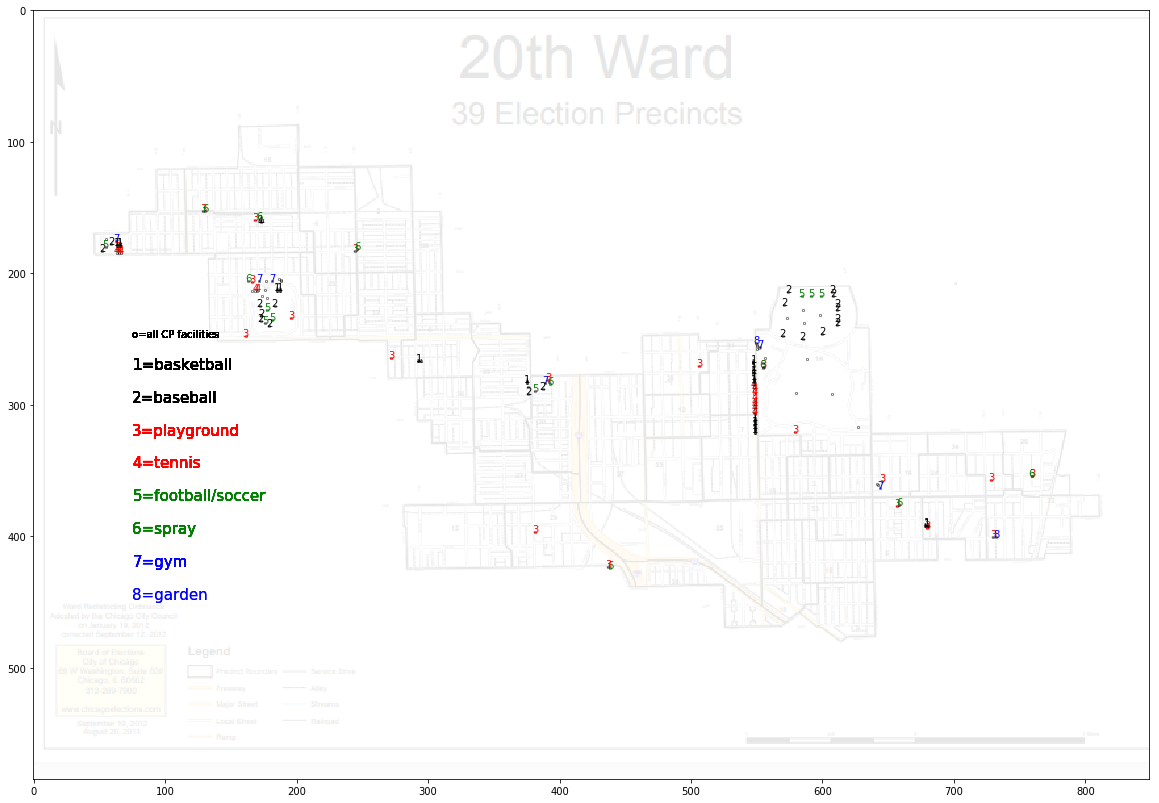

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("ward20.png")
plt.figure(figsize=(20,16))
plt.imshow(img,alpha=.1)
df=p

#use this format
for i in df.index:
    [x,y]=coord(df.loc[i,"latitude"],df.loc[i,"longitude"])
    point=Point(df.loc[i,"longitude"],df.loc[i,"latitude"])
    if point.within(Polygon(shapes[3].points)):
        plt.text(x,y,"o",color='black',size=5,ha='center',va='bottom')
        plt.text(75,250,"o=all CP facilities",color='black',size=10,ha='left',va='bottom')
        if df.loc[i,"type"]=="BASKETBALL BACKBOARD":
            plt.text(x,y,"1",color='black',size=5,ha='center',va='bottom')
            plt.text(75,275,"1=basketball",color='black',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="BASKETBALL COURT":
            plt.text(x,y,"1",color='black',size=10,ha='center',va='bottom')
        if df.loc[i,"type"]=="BASEBALL JR/SOFTBALL":
            plt.text(x,y,"2",color='black',size=10,ha='center',va='bottom')
            plt.text(75,300,"2=baseball",color='black',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="BASEBALL SR":
            plt.text(x,y,"2",color='black',size=10,ha='center',va='bottom')
        if df.loc[i,"type"]=="PLAYGROUND":  
            plt.text(x,y,"3",color='red',size=10,ha='center',va='bottom')
            plt.text(75,325,"3=playground",color='red',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="TENNIS COURT":
            plt.text(x,y,"4",color='red',size=10,ha='center',va='bottom')
            plt.text(75,350,"4=tennis",color='red',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="FOOTBALL/SOCCER COMBO FLD":
            plt.text(x,y,"5",color='green',size=10,ha='center',va='bottom')
            plt.text(75,375,"5=football/soccer",color='green',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="SPRAY FEATURE":
            plt.text(x,y,"6",color='green',size=10,ha='center',va='bottom')
            plt.text(75,400,"6=spray",color='green',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="GYMNASIUM":
            plt.text(x,y,"7",color='blue',size=10,ha='center',va='bottom')
            plt.text(75,425,"7=gym",color='blue',size=15,ha='left',va='bottom')
        if df.loc[i,"type"]=="COMMUNITY GARDEN":
            plt.text(x,y,"8",color='blue',size=10,ha='center',va='bottom')
            plt.text(75,450,"8=garden",color='blue',size=15,ha='left',va='bottom')
plt.savefig("recreation.png")
plt.show()

<h3> 2. Tax Year 2019 Owner-Occupied Tax Sale Data for Ward 20</h3>

2a) Import tax-sale data.

In [10]:
df=pd.read_excel("Ward20residentialparcels.xlsx")
df2=pd.read_excel("HEIcandidateparcels.xlsx")

2b) Create map of Ward 20 residential parcels and HEI candidate parcels.

In [11]:
import folium # map rendering library
from folium.features import DivIcon #used to add popup info to a map

In [12]:
Chicago_map = folium.Map(location=[41.78453, -87.62859],  tiles="Stamen Toner", zoom_start=15,alpha=.2)
for i in np.arange(0,169,1):
    p=[df.loc[i,"latitude"],df.loc[i,"longitude"]]
    folium.Marker(p,icon=DivIcon(
        icon_size=(100,0),
        icon_anchor=(0,8),
        html='<div style="font-size: 2pt; color : black">'+'</div>',
            )).add_to(Chicago_map)
    Chicago_map.add_child(folium.CircleMarker(p, radius=1,color='black'))
for i in np.arange(0,92,1):
    p2=[df2.loc[i,"latitude"],df2.loc[i,"longitude"]]
    folium.Marker(p2,icon=DivIcon(
        icon_size=(100,0),
        icon_anchor=(0,8),
        html='<div style="font-size: 6pt; color : lightgray">'+'   '+str(df2.loc[i,"Total Tax Due"])+ '</div>',
            )).add_to(Chicago_map)
    Chicago_map.add_child(folium.CircleMarker(p2, radius=1,color='lightgray'))
Chicago_map.save("HEItaxsaleyear19map.html")
Chicago_map

2c) Make histogram showing tax sale amouts for Ward 20 residential parcels and HEI candidate parcels.

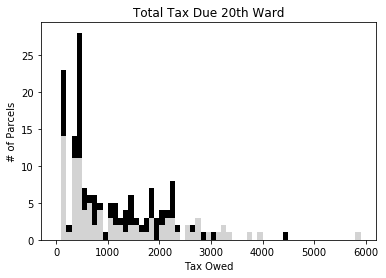

In [13]:
# plotting first histogram
df["Total Tax Due"].hist(grid=False, bins=range(0,6000,100),color='k')
# plotting second histogram
df2["Total Tax Due"].hist(grid=False, bins=range(0,6000,100),color='lightgray')
plt.xlabel('Tax Owed')
plt.ylabel('# of Parcels')
 
plt.title('Total Tax Due 20th Ward')
plt.savefig("TS2019.png")
# Showing the plot using plt.show()
plt.show()

<h3>3. Low Income Track Clustering</h3>

3a) Read in census tract data.

In [14]:
rawdf=pd.read_csv("tract_covariates.csv")

In [15]:
rawdf.columns

Index(['tract', 'county', 'state', 'hhinc_mean2000', 'mean_commutetime2000',
       'frac_coll_plus2010', 'frac_coll_plus2000', 'foreign_share2010',
       'med_hhinc2016', 'med_hhinc1990', 'popdensity2000', 'poor_share2010',
       'poor_share2000', 'poor_share1990', 'share_black2010', 'share_hisp2010',
       'share_asian2010', 'share_black2000', 'share_white2000',
       'share_hisp2000', 'share_asian2000', 'gsmn_math_g3_2013',
       'rent_twobed2015', 'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'nonwhite_share2010', 'popdensity2010', 'cz',
       'czname', 'ann_avg_job_growth_2004_2013', 'job_density_2013'],
      dtype='object')

In [16]:
rawdf.shape

(74123, 38)

3b) Filter data to Cook County tracts with median 2016 household income <30,000.

In [17]:
IL=rawdf[rawdf['state']== 17]
IL.shape

(3128, 38)

In [18]:
cook=IL[IL['county']==31]
cook.shape

(1319, 38)

In [19]:
low_inc=cook[cook['med_hhinc2016']<30000]
low_inc.shape

(202, 38)

3c) Prepare columns used for separation.

In [20]:
df=low_inc[['tract','emp2000', 'frac_coll_plus2010','job_density_2013',   'mean_commutetime2000', 'med_hhinc2016','popdensity2010', 'rent_twobed2015','singleparent_share2010']] 
df.columns       

Index(['tract', 'emp2000', 'frac_coll_plus2010', 'job_density_2013',
       'mean_commutetime2000', 'med_hhinc2016', 'popdensity2010',
       'rent_twobed2015', 'singleparent_share2010'],
      dtype='object')

In [21]:
df.columns=['Tract','emp','college','jobdensity','commute','hhincome','popdensity','rent','singleparent']
df.head(1)

,Tract,emp,college,jobdensity,commute,hhincome,popdensity,rent,singleparent
21107,10100,0.560484,0.349921,2530.6123,41.525024,29861.0,33020.406,1153.0,0.543056


In [22]:
for i in df.index:
    df.loc[i,"work"]=df.loc[i,"jobdensity"]/df.loc[i,"popdensity"]
    df.loc[i,"room"]=df.loc[i,'rent']/df.loc[i,'hhincome']

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3d) Normalize values

In [23]:
df.shape

(202, 11)

In [24]:
df=df.dropna()
df.shape

(167, 11)

In [25]:
Mwork=df["work"].max()
mwork=df["work"].min()
Mroom=df["room"].max()
mroom=df["room"].min()
Msingleparent=df["singleparent"].max()
msingleparent=df["singleparent"].min()
Mcommute=df["commute"].max()
mcommute=df["commute"].min()
Mcollege=df["college"].max()
mcollege=df["college"].min()
Mhhincome=df["hhincome"].max()
mhhincome=df["hhincome"].min()

In [26]:
#normalize values
for i in df.index:
    df.loc[i,"work"]=(df.loc[i,"work"]-mwork)/(Mwork-mwork)
    df.loc[i,"room"]=(df.loc[i,"room"]-mroom)/(Mroom-mroom)
    df.loc[i,"singleparent"]=(df.loc[i,"singleparent"]-msingleparent)/(Msingleparent-msingleparent)
    df.loc[i,"commute"]=(df.loc[i,"commute"]-mcommute)/(Mcommute-mcommute)
    df.loc[i,"education"]=(df.loc[i,"college"]-mcollege)/(Mcollege-mcollege)
    df.loc[i,"income"]=(df.loc[i,"hhincome"]-mhhincome)/(Mhhincome-mhhincome)

In [27]:
tracts=df[["Tract","work","room","education","income","singleparent","commute"]]
tracts.shape

(167, 7)

In [28]:
tracts=tracts.dropna()
tracts.shape

(167, 7)

3e) Separate into two clusters.

In [29]:
cols=["work","room","education","income","singleparent","commute"]
tractcluster=tracts[cols]

In [30]:
import sklearn
from sklearn.cluster import KMeans

In [31]:
# Fit the k means model
k_means = KMeans(init="k-means++", n_clusters=2, n_init=2)
k_means.fit(tractcluster)
#Get Labels
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [32]:
tracts["CLASS"]=k_means_labels
tracts=tracts.reset_index(drop=True)
tracts.head(2)

,Tract,work,room,education,income,singleparent,commute,CLASS
0,10100,0.012277,0.228804,0.423649,0.994194,0.491649,0.554853,1
1,10202,0.043318,0.222477,0.280312,0.973262,0.617686,0.401514,1


In [33]:
C0=tracts[tracts["CLASS"]==0]
C0.head(1)

,Tract,work,room,education,income,singleparent,commute,CLASS
11,231200,0.012669,0.1637,0.129681,0.843523,0.733,0.707592,0


In [34]:
C1=tracts[tracts["CLASS"]==1]
C1.head(1)

,Tract,work,room,education,income,singleparent,commute,CLASS
0,10100,0.012277,0.228804,0.423649,0.994194,0.491649,0.554853,1


In [35]:
C0.shape

(101, 8)

In [36]:
C1.shape

(66, 8)

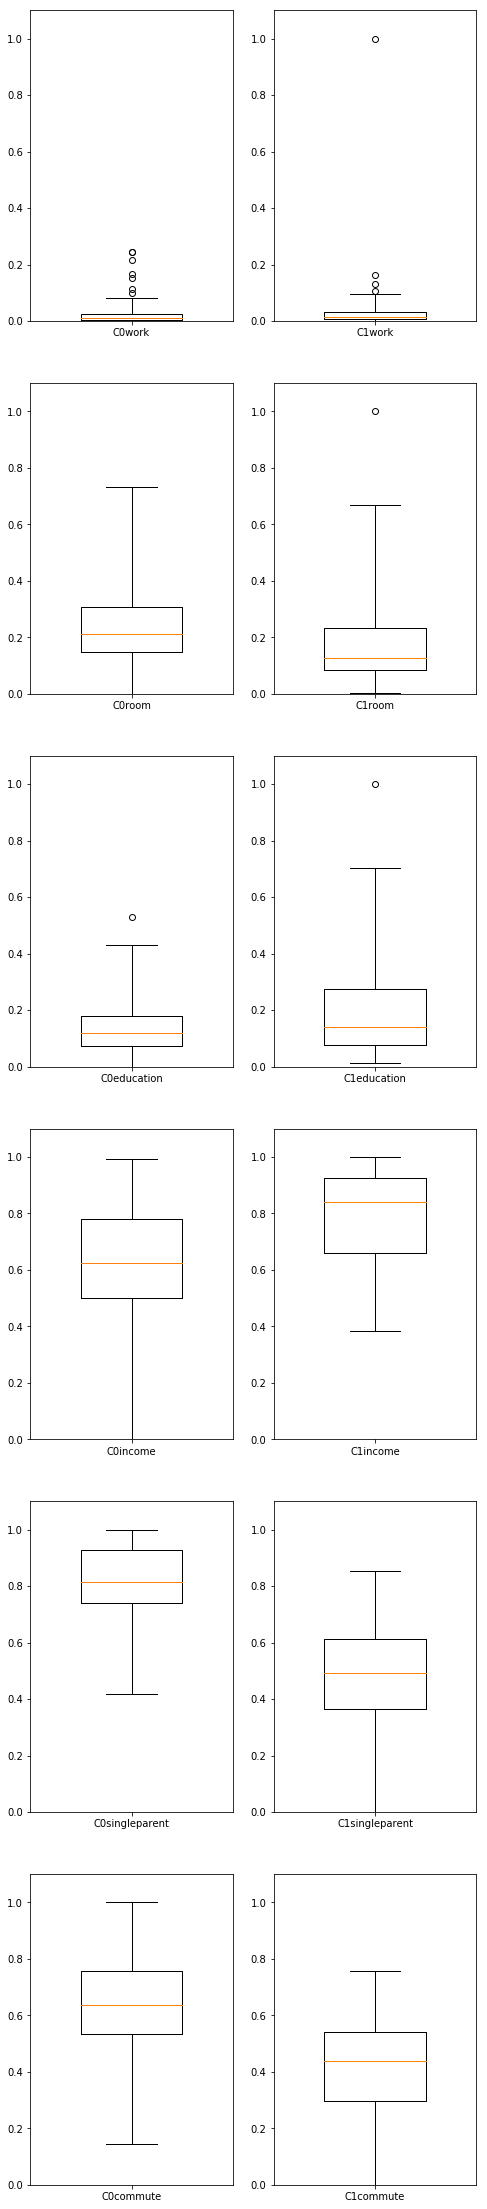

In [37]:
numplots=len(cols)
plt.figure(figsize=[10,numplots])
fig, axes = plt.subplots(numplots,2,figsize=[8,40])
for i in np.arange(0,numplots,1):
    axes[i,0].set_ylim((0,1.1))
    axes[i,1].set_ylim((0,1.1))
    axes[i,0].boxplot(C0[cols[i]],whis=3,labels=['C0'+cols[i]],widths=.5)
    axes[i,1].boxplot(C1[cols[i]],whis=3,labels=['C1'+cols[i]],widths=.5)
fig.savefig('6IndR1.png') #Save our figure to a file
plt.show()

Can continue the same process starting with the cluster that exhibits greater hardship.